<a href="https://colab.research.google.com/github/sateesh12/deep_learning_basics/blob/master/Vehicle_mpg_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This is an example code to learn how to use Keras to predict vehicle mileage

In [2]:
#Check tensor flow version and esnure that it is 2.x
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
#Import libraries
import pathlib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Import the Vehicle mpg data-set into the colab directory
#Details about the fields in the data set is at https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG
dataset_file = tf.keras.utils.get_file("auto-mpg.data-original", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original")


32768/32149 [==============================] - 0s 4us/step


In [5]:
#Check the path of where the data is downloaded.
dataset_file

'/root/.keras/datasets/auto-mpg.data-original'

In [6]:
#Label the data-set with following column names
column_name = ['mpg','cylinders','displacement','hp','weight','acceleration','MY','country_of_origin']
print(column_name)

['mpg', 'cylinders', 'displacement', 'hp', 'weight', 'acceleration', 'MY', 'country_of_origin']


In [15]:
dataset_V1 = pd.read_csv(dataset_file)

In [31]:
dataset_V1.head()
#As can be seen from the below o/p
#1. The data-set does not have column names
#2. The data set is space seperated
#3. The data-set has mutiple spaces as delimiter.
#4. The last column starts with a tab character

,"18.0 8. 307.0 130.0 3504. 12.0 70. 1.\t""chevrolet chevelle malibu"""
0,15.0 8. 350.0 165.0 3693. 1...
1,18.0 8. 318.0 150.0 3436. 1...
2,16.0 8. 304.0 150.0 3433. 1...
3,17.0 8. 302.0 140.0 3449. 1...
4,15.0 8. 429.0 198.0 4341. 1...


In [35]:
#The dataset does not have any lables, so add labels to the Pandas data-frame
#Data is as follows
#<value1><b><b><b><value2> with columns not being named.
dataset_V2 = pd.read_csv(dataset_file,
                         names=column_name,
                         na_values = "?",   #Treat ? also as a NaN
                         sep=" "       ,    # Use space as de-limited between columns
                         skipinitialspace = True, #Ignore space after first delmiter value => x <space><space><space> y, take only first space
                         comment='\t'       #Ignore everything after a tab.
                        )
                      
dataset_V2.info

<bound method DataFrame.info of       mpg  cylinders  displacement  ...  acceleration    MY  country_of_origin
0    18.0        8.0         307.0  ...          12.0  70.0                1.0
1    15.0        8.0         350.0  ...          11.5  70.0                1.0
2    18.0        8.0         318.0  ...          11.0  70.0                1.0
3    16.0        8.0         304.0  ...          12.0  70.0                1.0
4    17.0        8.0         302.0  ...          10.5  70.0                1.0
..    ...        ...           ...  ...           ...   ...                ...
401  27.0        4.0         140.0  ...          15.6  82.0                1.0
402  44.0        4.0          97.0  ...          24.6  82.0                2.0
403  32.0        4.0         135.0  ...          11.6  82.0                1.0
404  28.0        4.0         120.0  ...          18.6  82.0                1.0
405  31.0        4.0         119.0  ...          19.4  82.0                1.0

[406 rows x 8 colum

In [36]:
dataset_V2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mpg                398 non-null    float64
 1   cylinders          406 non-null    float64
 2   displacement       406 non-null    float64
 3   hp                 400 non-null    float64
 4   weight             406 non-null    float64
 5   acceleration       406 non-null    float64
 6   MY                 406 non-null    float64
 7   country_of_origin  406 non-null    float64
dtypes: float64(8)
memory usage: 25.5 KB


In [37]:
#Check if column name and data are aligned
dataset_V2.head()
#As can be seen, now the 

,mpg,cylinders,displacement,hp,weight,acceleration,MY,country_of_origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [40]:
#Identify the missing values
dataset_V2.isna().sum()

mpg                  8
cylinders            0
displacement         0
hp                   6
weight               0
acceleration         0
MY                   0
country_of_origin    0
dtype: int64

In [41]:
dataset_V3 = dataset_V2.dropna()

In [42]:
#Check if all NaN are gone
dataset_V3.isna().sum()

mpg                  0
cylinders            0
displacement         0
hp                   0
weight               0
acceleration         0
MY                   0
country_of_origin    0
dtype: int64

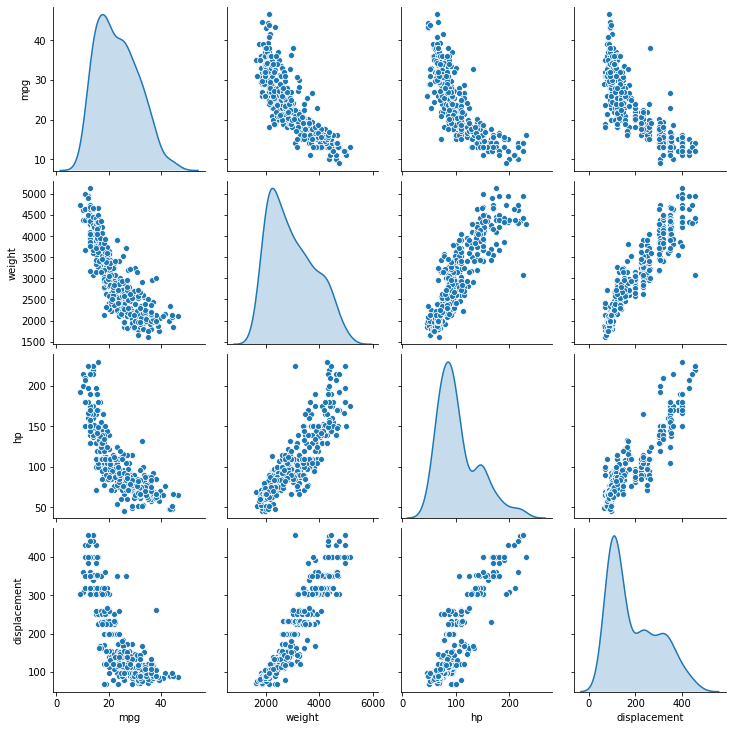

In [45]:
#Plot the data to see
sns.pairplot(dataset_V3[['mpg','weight','hp','displacement']],diag_kind='kde')

In [49]:
#The data-set has a categorical value of Origin
dataset_V4 = pd.concat([dataset_V3,pd.get_dummies(dataset_V3['country_of_origin'],prefix='country_of_origin')], axis=1)
del dataset_V4['country_of_origin']
dataset_V4.head()

,mpg,cylinders,displacement,hp,weight,acceleration,MY,country_of_origin_1.0,country_of_origin_2.0,country_of_origin_3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0


In [52]:
#Split the data into training and test
#80% Data is for training
dataset_V4_training = dataset_V4.sample(frac=0.8, random_state=0)

#Move the remaining 20% as test data
dataset_V4_test = dataset_V4.drop(dataset_V4_training.index)

In [53]:
#Peek into training data
dataset_V4_training.head()

,mpg,cylinders,displacement,hp,weight,acceleration,MY,country_of_origin_1.0,country_of_origin_2.0,country_of_origin_3.0
153,28.0,4.0,90.0,75.0,2125.0,14.5,74.0,1,0,0
289,22.3,4.0,140.0,88.0,2890.0,17.3,79.0,1,0,0
76,12.0,8.0,350.0,160.0,4456.0,13.5,72.0,1,0,0
386,38.0,4.0,105.0,63.0,2125.0,14.7,82.0,1,0,0
338,33.8,4.0,97.0,67.0,2145.0,18.0,80.0,0,0,1


In [54]:
#Peek into test data
dataset_V4_test.head()

,mpg,cylinders,displacement,hp,weight,acceleration,MY,country_of_origin_1.0,country_of_origin_2.0,country_of_origin_3.0
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1,0,0
31,10.0,8.0,360.0,215.0,4615.0,14.0,70.0,1,0,0
34,9.0,8.0,304.0,193.0,4732.0,18.5,70.0,1,0,0
37,25.0,4.0,113.0,95.0,2228.0,14.0,71.0,0,0,1
40,19.0,6.0,232.0,100.0,2634.0,13.0,71.0,1,0,0


In [55]:
#Label the output value in both training and test data-set
train_label = dataset_V4_training.pop('mpg')
test_label = dataset_V4_test.pop('mpg')
#print(train_label)


153    28.0
289    22.3
76     12.0
386    38.0
338    33.8
       ... 
288    19.8
236    16.0
157    26.0
152    32.0
189    28.0
Name: mpg, Length: 314, dtype: float64


In [83]:
#Develop stats of the training and test data-sets
training_stats = dataset_V4_training.describe()
training_stats = training_stats.transpose()

test_stats = dataset_V4_test.describe()
test_stats = test_stats.transpose()
test_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,78.0,5.448718,1.740633,3.0,4.00,4.00,8.00,8.0
displacement,78.0,190.762821,106.494733,70.0,98.00,138.00,292.00,400.0
hp,78.0,102.858974,40.255265,48.0,74.25,90.00,121.75,230.0
weight,78.0,2926.589744,874.900416,1613.0,2159.50,2692.50,3706.50,4746.0
acceleration,78.0,15.469231,2.649298,8.5,13.70,15.25,17.00,22.2
MY,78.0,76.307692,3.721847,70.0,73.00,76.00,79.75,82.0
country_of_origin_1.0,78.0,0.628205,0.486412,0.0,0.00,1.00,1.00,1.0
country_of_origin_2.0,78.0,0.153846,0.363137,0.0,0.00,0.00,0.00,1.0
country_of_origin_3.0,78.0,0.217949,0.415525,0.0,0.00,0.00,0.00,1.0


In [84]:
#Write a function to normalize the training and test data-set
def norm_train(x):
  return(x - training_stats['mean'])/(training_stats['std'])

def norm_test(x):
  return(x - test_stats['mean'])/(test_stats['std'])

dataset_V5_training = norm_train(dataset_V4_training)
dataset_V5_test = norm_test(dataset_V4_test)

In [89]:
#Now comes the T-F flow
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64,activation='relu',input_shape=[len(dataset_V5_training.keys())]),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(1)                        
])

#Choose the optimizer
optimizer = tf.keras.optimizers.Adam()

#Compile model
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae','mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [93]:
#Run the model
EPOCHS = 1000
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(dataset_V5_training,train_label,epochs=EPOCHS, validation_split=0.20,callbacks=[early_stop],verbose=1)

Epoch 1/1000
8/8 [==============================] - 0s 25ms/step - loss: 591.6714 - mae: 23.0511 - mse: 591.6714 - val_loss: 595.6995 - val_mae: 23.1293 - val_mse: 595.6995
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 559.4439 - mae: 22.3528 - mse: 559.4439 - val_loss: 558.4022 - val_mae: 22.3258 - val_mse: 558.4022
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 524.5913 - mae: 21.5815 - mse: 524.5913 - val_loss: 516.8524 - val_mae: 21.3887 - val_mse: 516.8524
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 484.1949 - mae: 20.6550 - mse: 484.1949 - val_loss: 468.3558 - val_mae: 20.2401 - val_mse: 468.3558
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 438.1196 - mae: 19.5136 - mse: 438.1196 - val_loss: 410.6508 - val_mae: 18.8028 - val_mse: 410.6508
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 381.8203 - mae: 18.0797 - mse: 381.8203 - val_loss: 346.2311 - val_

In [94]:
#Model Evaluation
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
117,6.154376,1.733557,6.154376,8.218233,2.185468,8.218233,117
118,6.167362,1.737235,6.167362,8.202200,2.191909,8.202201,118
119,6.121984,1.722058,6.121984,8.171807,2.189420,8.171808,119
120,6.089565,1.719664,6.089565,8.213232,2.182918,8.213232,120
121,6.085750,1.727696,6.085750,8.255772,2.164903,8.255771,121


In [97]:
#Model evaluate
loss, mae, mse = model.evaluate(dataset_V5_test, test_label, verbose=2)
print("MAE", mae)


3/3 - 0s - loss: 5.8337 - mae: 1.8454 - mse: 5.8337
MAE 1.845444679260254


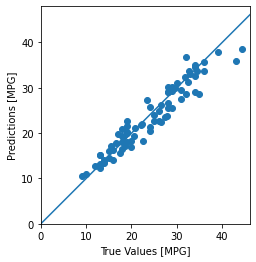

In [99]:
#Model prediction and plotting
#model predictions on test data
test_predictions = model.predict(dataset_V5_test).flatten()

plt.scatter(test_label, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])